# <a href="https://thetahat.ru/courses/bm-2024-aut">Cтатистика ФБМФ </a>

## Семинар 10

In [3]:
# Bot check

# HW_ID: st_sem10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
import numpy as np
import random
import scipy.stats as sps
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)

In [7]:
# зафиксируем сид для воспроизводимости генерации
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Проверка гипотез

В этом задании мы продолжим работать с критерием, которой мы ввели в предыдущем семинаре для проверки гипотезы $\mathsf{H}_0\colon \theta = 0$ vs. $\mathsf{H}_1\colon \theta \neq 0$:
$$S=\left\{ 0 \notin \left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right\}$$


где $ \alpha_{int} = 0.95 $

Таким образом, при получении выборки $X$ проверка $\mathsf{H}_0$ выглядит следующим образом:

$$X \in S  \Leftrightarrow	\text{0 НЕ лежит в построенном доверительном интервале} \Leftrightarrow \mathsf{H}_0 \text{ отвергается}$$
$$X \notin S  \Leftrightarrow	\text{0 лежит в построенном доверительном интервале} \Leftrightarrow \mathsf{H}_0 \text{ НЕ отвергается}$$


## P-value

На лекции вы узнали про p-value &mdash; это минимальный уровень значимости, при котором гипотеза еще может быть отвергнута:

$$pvalue = min\left\{ \alpha| X \in S\right\}$$

В нашем случае можно формула принимает следующий вид:
$$pvalue = min\left\{ \alpha\:\bigg|\:0 \notin \left(\overline{X} - \frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}\right)\right\}$$

Для имеющейся выборки постройте график факта отвержения нулевой гипотезы нашим критерием в зависимости от уровня значимости $\alpha \in (0, 1)$.

In [74]:
def criterion(sample, alpha=0.05):
    """
    Функция определяющая факт отвержения гипотезы

    :param sample: выборка
    :return: 0, если гипотеза была отвергнута, 1 - в противном случае
    """
    n = len(sample)
    z = sps.norm.ppf(1 - alpha/2)
    
    # посчитайте оценки параметров по имеющейся выборке
    theta_hat = np.mean(sample)
    sigma_hat = np.std(sample)
    
    # постройте доверительный интервал и выведите его
    if (theta_hat - (z*sigma_hat)/np.sqrt(n)) < 0 and 0 <(theta_hat + (z*sigma_hat)/np.sqrt(n)):
        return 1
    return 0

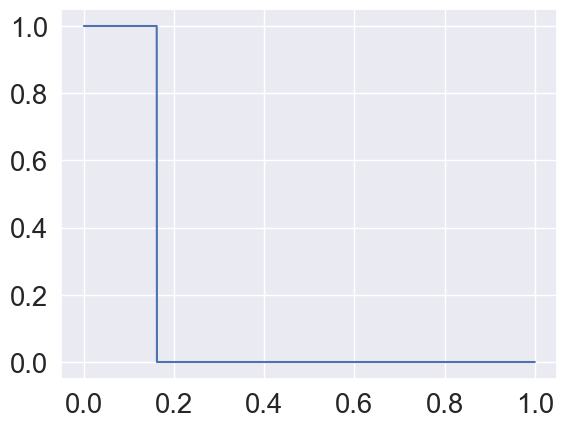

In [76]:
sample = [ 0.12452627,  0.95075805,  0.77166076, -1.45365582, -0.49410224,
          1.66660296, -0.93194618, -0.42985368,  0.27260541,  1.46066343,
          -1.31198164,  0.20520295,  3.19213611,  0.55957285,  0.50613194,
          0.05689217, -0.8558408 ,  0.12584525,  0.73918692, -0.05739113,
          0.76803961,  0.32823556,  0.05156772, -0.0566054 ,  0.60217298,
          2.21606323, -1.02851902, -0.56797192, -0.64263642,  0.95315636]

# Задаем сетку параметров alpha
alphas = np.linspace(0, 1, 2000)

# Создаем массив, в который будет записывать результат проверки гипотезы в зависимости от alpha
is_rejected = []
for alpha in alphas:
  is_rejected.append(criterion(sample, alpha))

plt.plot(alphas, is_rejected)

Выведите полученное значение p-value.

In [78]:
is_rejected = []
for alpha in alphas:
  if criterion(sample, alpha) == 0:
      print(alpha)
      break

0.16208104052026012


# Критерий Вальда

Вы провели эксперимент и получили данные из экспоненциального распределения. 

In [99]:
sample = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
          0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
          0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
          0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
          0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
          0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096]

Вы хотите проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

## Двусторонняя альтернатива
$X_1, ... X_n$ - выборка из распределения $Exp(\theta)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \theta = 2$ vs. $\mathsf{H}_1\colon \theta \neq 2$

Из лекции вы узнали про критерий Вальда.
Для случая двусторонней альтернативы $\mathsf{H}_1\colon \theta \neq \theta_0$ критерий имел следующий вид:
$$\large{S = \left\{ \left|\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} \right| > z_{1 - \frac{\alpha}{2}} \right\}}$$

где $\hat{\theta}$ &mdash; асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\sigma^2(\theta)$, 
$\hat{\sigma}$ &mdash; состоятельная оценка $\sigma(\theta)$.  

Эквивалентный асимптотичсекий доверительный интервал для параметра $\theta$ уровня доверия $1-\alpha$
$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

На первой лекции вы получали, что $\frac{1}{\overline{X}}$ &mdash; АНО для параметра $\theta$ c асимптотической дисперсией $\theta^2$

**Выпишите состоятельную оценку дисперсии и статистику критерия Вальда**


**Ответ:**  

Статистика Вальде: $\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}}$

Состоятельная оценка дисперсии: $\sqrt{\frac{1}{X^2}}$

Первым шагом необходимо выставить уровень значимости, поставим $\alpha = 0.05$

In [105]:
alpha = 0.05
theta = 2 # тета из основной гипотезы
n = len(sample)

Посчитаем квантиль (критическое значение)

In [108]:
z = sps.norm.ppf(1 - alpha/2)
z

1.959963984540054

Посчитайте статистику, которую будете сравнивать с критическим значением. Выведите значение полученной статистики.

In [117]:
statistic = np.sqrt(n)*((1/np.mean(sample) - theta)/(np.sqrt(1/(np.mean(sample))**2)))
statistic

3.2704505437191247

Сравним модуль статистики с критическим значением

In [120]:
np.absolute(statistic) > z

True

**Какой вывод можно сделать?**

**Вывод:** Критерий выполняется, значит мы отвергаем $H_0$

Посчитайте доверительный интервал

In [127]:
print (1/np.mean(sample) - z*(np.sqrt(1/(np.mean(sample))**2))/np.sqrt(n), 1/np.mean(sample) + z*(np.sqrt(1/(np.mean(sample))**2))/np.sqrt(n))

3.187693843343649 6.740324187101983


**Какой вывод можно сделать?**

**Вывод:** Получаем тот же самый результат - $H_0$ отвергается, так как 2 не попадает в этот интервал.

На лекции вы узнали про p-value &mdash; это вероятность получить при справедливости $H_0$ такое значение статистики $t = T(x)$ или еще более экстремальное, то есть в случае двустороннего критерия
$$p(x) = \mathsf{P}_0(T(X) \geq|t|) + \mathsf{P}_0(T(X) \leq -|t|)$$
Посчитайте p-value. Для этого можно использовать функции из библиотеки `scipy.stats`.

In [132]:
sps.norm.cdf(-statistic) + sps.norm.sf(statistic)

0.0010737631605120244

Оформите подсчет статистики и  p-value в виде одной функции.

In [159]:
def wald_test_two_sided(sample, theta, estimation_theta, estimation_sigma):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """
    n = len(sample)
    statistic = np.sqrt(n)*((1/np.mean(sample) - theta)/(np.sqrt(1/(np.mean(sample))**2)))
    p_value = sps.norm.cdf(-statistic) + sps.norm.sf(statistic)
    conf_int = [1/np.mean(sample) - z*(np.sqrt(1/(np.mean(sample))**2))/np.sqrt(n), 1/np.mean(sample) + z*(np.sqrt(1/(np.mean(sample))**2))/np.sqrt(n)]
    return statistic, p_value, conf_int

Теперь посмотрим на выборку меньших размеров

In [162]:
sample_cut = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252]

Выведите статистику, p-value и доверительный интервал. Какой вывод можно сделать из полученных значений?

In [170]:
results = (wald_test_two_sided(sample_cut, theta = 2, estimation_theta = 1/np.mean(sample), estimation_sigma = (np.sqrt(1/(np.mean(sample))**2))))
print('Статистика '+ str(results[0]))
print('p-value '+ str(results[1]))
print('Доверительный интервал '+ str(results[2]))

Статистика 1.5384953893457125
p-value 0.12392753500064685
Доверительный интервал [1.480880407715241, 6.309025214462183]


**Вывод:** Здесь получаем другой результат - $H_0$ не отвергается во всех трёх способах проверки (через статистику, p-value, доверительный интервал)
